In [46]:
from PIL import Image

img_path = './data2/2014/18_em_4.bmp'  #'./data2/2014/18_em_1.bmp'   './data2/train/2_em_7.bmp'

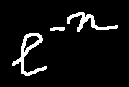

In [47]:
img = Image.open(img_path).convert("RGB")
img


In [48]:
img_name = img_path.strip(".bmp")
img_name = img_name.partition("2014/")

with open('./data2/2014/caption.txt') as label:
    for line in label.readlines():
        #print(line.split("\t"))
        if img_name[2] == line.split("\t")[0]:
            print(line.split("\t")[1])


e ^ { - n }



In [49]:
import transformers
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten") #'microsoft/trocr-base-handwritten'
model = VisionEncoderDecoderModel.from_pretrained('./checkpoint_eval_2014_small_stage1/checkpoint-12000')



In [50]:
pixel_values = processor(img, return_tensors="pt").pixel_values
print(pixel_values.shape)

torch.Size([1, 3, 384, 384])


greedy search

In [51]:
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

2 ^ { - m }


beam search

In [53]:
beam_output = model.generate(
    pixel_values, 
    num_beams=10, 
    early_stopping=True,
    num_return_sequences=5
)
print(processor.batch_decode(beam_output, skip_special_tokens=True)[0])
print(processor.batch_decode(beam_output, skip_special_tokens=True)[1])
print(processor.batch_decode(beam_output, skip_special_tokens=True)[2])
print(processor.batch_decode(beam_output, skip_special_tokens=True)[3])
print(processor.batch_decode(beam_output, skip_special_tokens=True)[4])


2 ^ { - m }
e ^ { - m }
2 ^ { - n }
e ^ { - n }
e ^ { - r }


Top-k

In [29]:
sample_output = model.generate(
    pixel_values, 
    do_sample=True, 
    top_k=50
)
print(processor.batch_decode(sample_output, skip_special_tokens=True)[0])

KeyboardInterrupt: 

In [ ]:
#def ocr_image(src_img):  #greedy
#  pixel_values = processor(images=src_img, return_tensors="pt").pixel_values
#  generated_ids = model.generate(pixel_values)
#  return processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [ ]:
#def ocr_image2(src_img):  #beam search
#  pixel_values = processor(images=src_img, return_tensors="pt").pixel_values
#  generated_ids = model.generate(pixel_values, num_beams=5,early_stopping=True)
#  return processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

In [ ]:
#ocr_image(img)

#ocr_image2(img)

'<s><s>\\sqrt { 4. 8 }</s>'